# Record Linkage with Machine Learning

In [65]:
import recordlinkage as rl
from recordlinkage.datasets import load_krebsregister
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [ ]:
krebs_data, krebs_match = load_krebsregister(missing_values=0)

In [53]:
krebs_data.head()

,,cmp_firstname1,cmp_firstname2,cmp_lastname1,cmp_lastname2,cmp_sex,cmp_birthday,cmp_birthmonth,cmp_birthyear,cmp_zipcode
id1,id2,,,,,,,,,
22161,38467,1.000000,0.0,0.142857,0.0,1,0.0,1.0,0.0,0.0
38713,75352,0.000000,0.0,0.571429,0.0,1,0.0,0.0,0.0,0.0
13699,32825,0.166667,0.0,0.000000,0.0,0,1.0,1.0,1.0,0.0
22709,37682,0.285714,0.0,1.000000,0.0,1,0.0,0.0,0.0,0.0
2342,69060,0.250000,0.0,0.125000,0.0,1,1.0,1.0,1.0,0.0


In [9]:
krebs_data.dtypes

cmp_firstname1    float64
cmp_firstname2    float64
cmp_lastname1     float64
cmp_lastname2     float64
cmp_sex             int64
cmp_birthday      float64
cmp_birthmonth    float64
cmp_birthyear     float64
cmp_zipcode       float64
dtype: object

In [10]:
krebs_data.shape

(5749132, 9)

In [11]:
krebs_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cmp_firstname1,5749132.0,0.712778,0.388839,0.0,0.285714,1.000000,1.000000,1.0
cmp_firstname2,5749132.0,0.016234,0.125199,0.0,0.000000,0.000000,0.000000,1.0
cmp_lastname1,5749132.0,0.315628,0.334234,0.0,0.100000,0.181818,0.428571,1.0
cmp_lastname2,5749132.0,0.000136,0.010081,0.0,0.000000,0.000000,0.000000,1.0
cmp_sex,5749132.0,0.955001,0.207301,0.0,1.000000,1.000000,1.000000,1.0
cmp_birthday,5749132.0,0.224434,0.417209,0.0,0.000000,0.000000,0.000000,1.0
cmp_birthmonth,5749132.0,0.488788,0.499874,0.0,0.000000,0.000000,1.000000,1.0
cmp_birthyear,5749132.0,0.222718,0.416070,0.0,0.000000,0.000000,0.000000,1.0
cmp_zipcode,5749132.0,0.005516,0.074067,0.0,0.000000,0.000000,0.000000,1.0


In [32]:
krebs_match.size

20931

In [19]:
# krebs_data.index

In [15]:
golden_pairs = krebs_data[0:5000]
golden_matches_index = golden_pairs.index & krebs_match # 2093 matching pairs

In [20]:
golden_matches_index.shape

(24,)

In [23]:
golden_matches_index.nlevels

2

In [21]:
golden_matches_index.levels

FrozenList([[14811, 17937, 20713, 22436, 23323, 23546, 28464, 28539, 29922, 31059, 32487, 33613, 34064, 34171, 34287, 35967, 40350, 46933, 49588, 69924, 75394, 79126, 88108, 89874], [14882, 23281, 27823, 27978, 34715, 43424, 46075, 46602, 47037, 48727, 61025, 63083, 64971, 69899, 71229, 71543, 72216, 74737, 81544, 83715, 84983, 89876, 92002, 94380]])

In [22]:
golden_matches_index.labels

FrozenList([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 11, 9, 1, 2, 3, 13, 4, 6, 16, 10, 12, 5, 7, 18, 14, 19, 8, 15, 17, 22, 20, 23, 21]])

In [24]:
golden_matches_index.names

FrozenList(['id1', 'id2'])

## Logistical Regression

In [25]:
# Initialize the classifier
logreg = rl.LogisticRegressionClassifier()

# Train the classifier
logreg.learn(golden_pairs, golden_matches_index)
print ("Intercept: ", logreg.intercept)
print ("Coefficients: ", logreg.coefficients)

Intercept:  -6.2980435710064135
Coefficients:  [0.49045284297837738, 0.12164048434875861, 2.1504048510985654, -0.0028481810133886604, -1.7971246518969017, 0.96108555772628979, 0.067261044100554931, 1.0340860752879613, 4.3055611017716364]


In [28]:
# Predict the match status for all record pairs
result_logreg = logreg.predict(krebs_data)

len(result_logreg)

20150

In [29]:
conf_logreg = rl.confusion_matrix(krebs_match, result_logreg, len(krebs_data))
conf_logreg

array([[  19884,    1047],
       [    266, 5727935]])

In [30]:
# The F-score for this prediction is
rl.fscore(conf_logreg)

0.9680387527080645

## Naive Bayes

In [33]:
# Train the classifier
nb = rl.NaiveBayesClassifier()
nb.learn(golden_pairs, golden_matches_index)

# Predict the match status for all record pairs
result_nb = nb.predict(krebs_data)

len(result_nb)

20345

In [34]:
conf_nb = rl.confusion_matrix(krebs_match, result_nb, len(krebs_data))
conf_nb

array([[  20023,     908],
       [    322, 5727879]])

In [35]:
# The F-score for this classification is
rl.fscore(conf_nb)

0.9702006008334141

## Support Vector Machines

In [36]:
# Train the classifier
svm = rl.SVMClassifier()
svm.learn(golden_pairs, golden_matches_index)

# Predict the match status for all record pairs
result_svm = svm.predict(krebs_data)

len(result_svm)

20839

In [37]:
conf_svm = rl.confusion_matrix(krebs_match, result_svm, len(krebs_data))
conf_svm

array([[  20825,     106],
       [     14, 5728187]])

In [38]:
# The F-score for this classification is
rl.fscore(conf_svm)

0.997127124730668

## K-Means Clustering

In [39]:
kmeans = rl.KMeansClassifier()
result_kmeans = kmeans.learn(krebs_data)

# The predicted number of matches
len(result_kmeans)

371525

In [40]:
cm_kmeans = rl.confusion_matrix(krebs_match, result_kmeans, len(krebs_data))

rl.fscore(cm_kmeans)

0.10598385551501316

## Expectation / Conditional Maximization Algorithm

In [43]:
# Train the classifier
ecm = rl.ECMClassifier()
result_ecm = ecm.learn((krebs_data > 0.8).astype(int))

len(result_ecm)

19817

In [44]:
conf_ecm = rl.confusion_matrix(krebs_match, result_ecm, len(krebs_data))
conf_ecm

array([[  19813,    1118],
       [      4, 5728197]])

In [45]:
# The F-score for this classification is
rl.fscore(conf_ecm)

0.9724649062530676

## Evaluation Criteria

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2 0 0]
 [0 0 1]
 [1 0 2]]


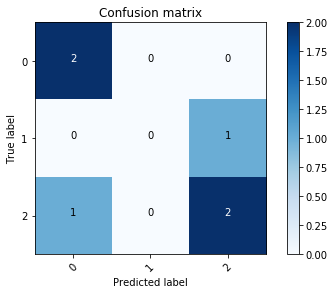

In [61]:
# Compute confusion matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cnf_matrix = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cnf_matrix,[0,1,2])

In [62]:
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



In [68]:
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.5

In [70]:
#todo specificity?